# DECISION TREE CLASSIFIER

### This data analysis is done by - Sakshi K More

### Data is selected from kaggle.com . The data is Salary data for data science field

#### importing all the required libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz

#### loading the dataset using the python pandas module

In [2]:
data=pd.read_csv("C:/Users/Sakshi more/OneDrive/Desktop/Salary Data.csv")

In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### checking the shape of the data

In [4]:
data.shape

(375, 6)

#### displaying the columns of the dataset

In [5]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

#### displaying the data type of the columns in the dataset

In [6]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

#### checking whether the data contains any null values

In [7]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
#dropping the null values
data.dropna(inplace=True)

In [9]:
data.shape

(373, 6)

In [10]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

now the data is free from the null values

#### converting the age and salary column data type which is float to int data type

In [11]:
data['Age']=data['Age'].astype(int)
data['Salary']=data['Salary'].astype(int)

In [12]:
data.dtypes

Age                      int32
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                   int32
dtype: object

## VISUALIZING DATA

#### classifying employees based on their Educational Level and Gender

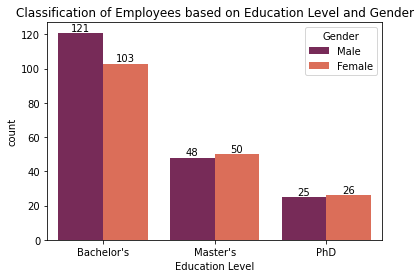

In [13]:
ax=sns.countplot(x='Education Level',data=data,hue='Gender',palette='rocket')
plt.title('Classification of Employees based on Education Level and Gender')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2.,p.get_height(),f'{p.get_height()}',ha='center',va='bottom')

from this we can infer that there are more number of males that persue bachelor's degree than females

also we can see that there is a slight increase in the number of females who persue masters and Phd then the Males

#### lets check if there is any relation between the salary and years of experience

Text(0.5, 1.0, 'Relation between Years of Experience and Salary of employees')

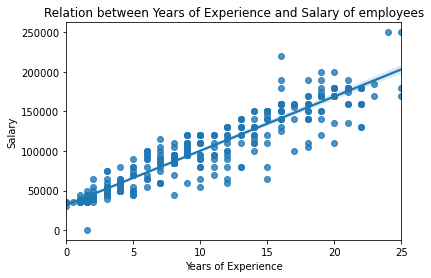

In [14]:
sns.regplot(x='Years of Experience',y='Salary',data=data)
plt.title('Relation between Years of Experience and Salary of employees')

from this chart we can infer that as the years of experience increases the salary of the employee also increases

this indicates that there is a direct relationship between years of experience and salary

### DECISION TREE CLASSIFIER

#### converting the Education level column which is in object datatype into int datatype for better analysis

#### for this we use the mapping function of the python

#### 1 = Bachelor's

#### 2 = Master's

#### 3 = PhD

In [15]:
data['Education Level']=data['Education Level'].map({'Bachelor\'s':1,'Master\'s':2,'PhD':3})

#### converting the Gender column which is in object datatype into int datatype for better analysis

#### for this we use the mapping function of the python

#### 1 = Male

#### 2 = Female

In [16]:
data['Gender']=data['Gender'].map({'Male':1,'Female':2})

In [17]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,1,Software Engineer,5.0,90000
1,28,2,2,Data Analyst,3.0,65000
2,45,1,3,Senior Manager,15.0,150000
3,36,2,1,Sales Associate,7.0,60000
4,52,1,2,Director,20.0,200000


#### splitting the data into training and testing data

In [18]:
#independent variables
x=data[['Age','Gender','Education Level','Years of Experience']]

In [19]:
#dependent variable
y=data['Salary']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

#### creating a Decision Tree Classifier Model

In [32]:
model=DecisionTreeClassifier(max_depth=3)

#### fit the model

In [33]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

#### predicting using the training model

In [34]:
prediction=model.predict(x_test)

#### creating a dataframe that shows the actual value and predicted value

In [35]:
df=pd.DataFrame({'Actual':y_test,'Predicted_value':prediction})

In [36]:
df.head()

,Actual,Predicted_value
360,40000,40000
269,110000,95000
303,150000,180000
130,160000,180000
44,130000,95000


#### determining the accuracy of the model

In [37]:
accuracy=accuracy_score(y_test,prediction)

In [38]:
print('The accuracy of the Decision Tree Classifier Model is: ',accuracy)

The accuracy of the Decision Tree Classifier Model is:  0.24


##### this accuracy score indicates that 24% of the the predictions made by the model are accurate. An accuracy score of 0.24 indicates that the model's performance is relatively low.

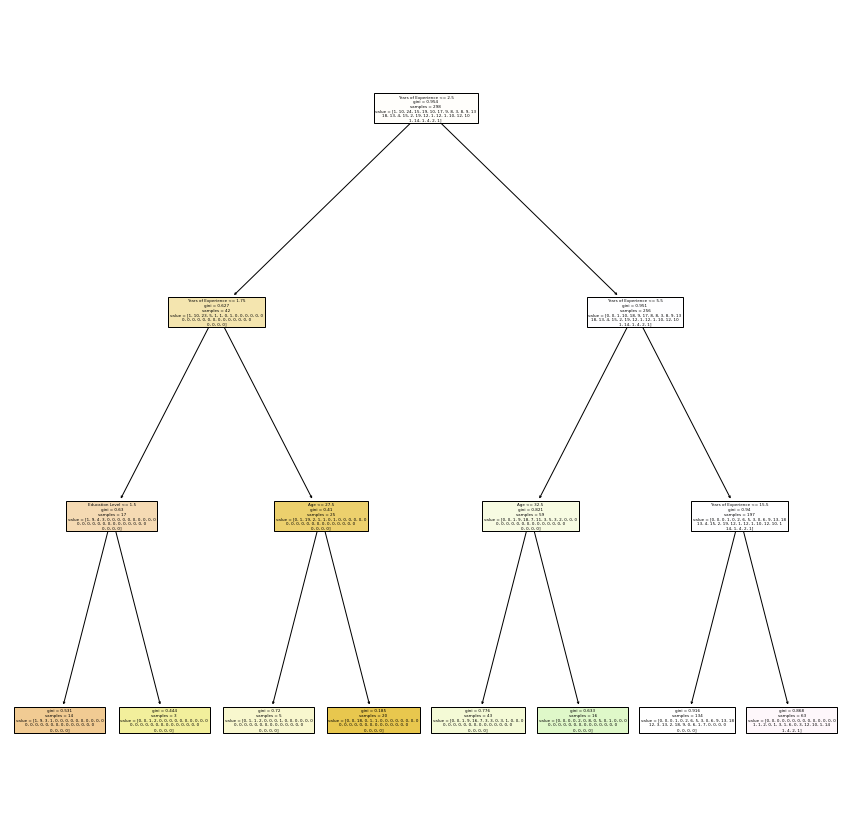

In [40]:
plt.figure(figsize=(15,15))
plot_tree(model,filled=True,feature_names=x.columns)
plt.show()